In [8]:
import numpy as np
from matplotlib import pyplot as pl
import os
import scipy.io.wavfile as wav

%matplotlib inline

In [9]:
PATH = './vowels/'

In [10]:
files = [file for file in os.listdir(PATH) if file.endswith(".wav")]
all_X = {}

for file in files:
    sample_rate, data = wav.read(os.path.join(PATH, file))
    all_X[file[:-4]] = (sample_rate, data)

X_1 = all_X['nafdlaa']
X_2 = all_X['namshaa']

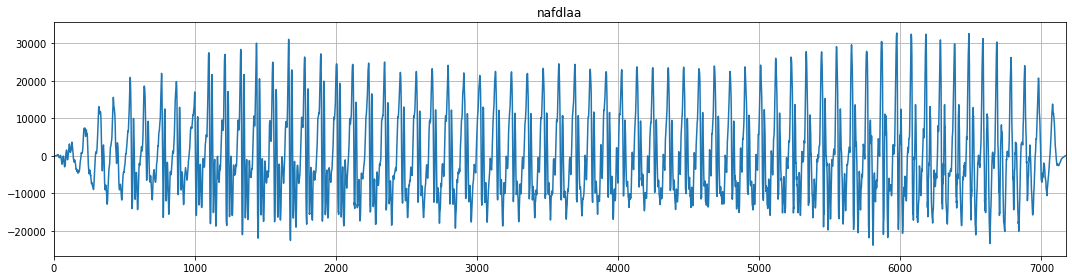

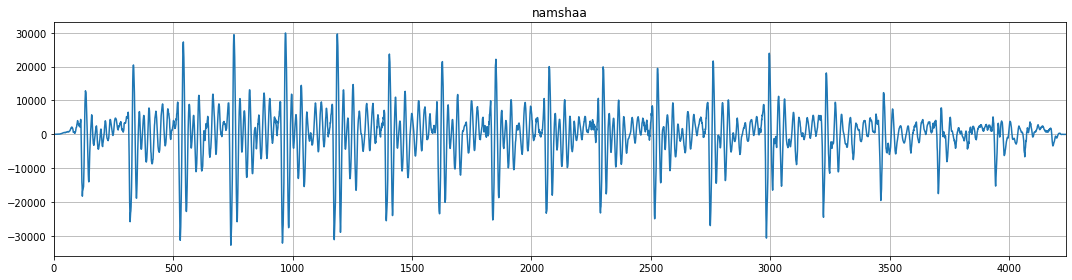

In [11]:
def plot_fig(index):
    X = all_X[index][1]
    
    pl.figure(figsize=(15,4))
    pl.plot(X)
    pl.xlim(0, len(X))
    pl.title(index)
    pl.grid()
    pl.tight_layout()


plot_fig('nafdlaa')
plot_fig('namshaa')
#plot_fig('nk3kmel')
#plot_fig('samphoo')

In [12]:
from python_speech_features import mfcc

In [13]:
ceps_1 = mfcc(X_1[1], samplerate=X_1[0], nfft=1024)
ceps_2 = mfcc(X_2[1], samplerate=X_2[0], nfft=1024)

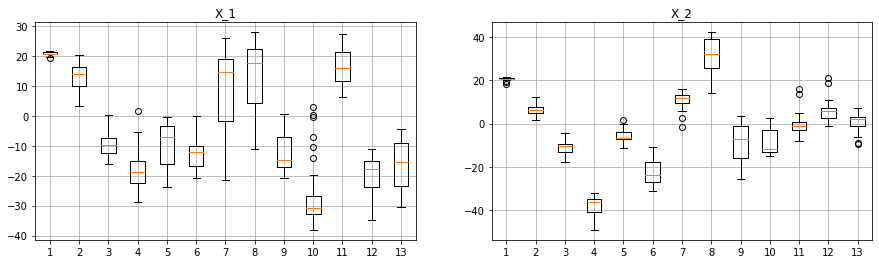

In [14]:
pl.figure(figsize=(15,4))
pl.subplot(1,2,1)
pl.boxplot(ceps_1)
pl.title('X_1')
pl.grid()
pl.subplot(1,2,2)
pl.boxplot(ceps_2)
pl.title('X_2')
pl.grid()

## Create neural network

In [8]:
MSE_train = np.zeros((EPOCHS, N_INITS))
MSE_test = np.zeros((EPOCHS, N_INITS))

nn = mlp.MLP([N_INPUT_NEURONS, N_HIDDEN_NEURONS, 1], 'tanh')

for i in np.arange(N_INITS):
    nn.init_weights()
    MSE_train[:, i], MSE_test[:, i] = cv.k_fold_cross_validation_per_epoch(nn, dataset, k=K,
                                                                           learning_rate=LEARNING_RATE,
                                                                           momentum=MOMENTUM,
                                                                           epochs=EPOCHS)
print(N_INITS * K, "tests done")

50 tests done


## Validating the results

Confusion matrix, F-score, cross-validation results...

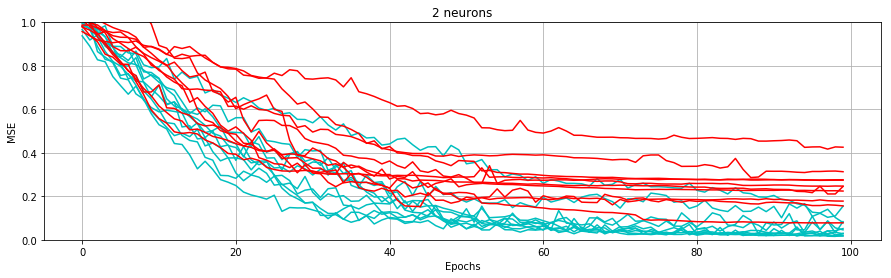

In [9]:
pl.figure(figsize=(15, 4))
pl.plot(MSE_train, c='c')
pl.plot(MSE_test, c='r')
pl.ylim(0, 1)
pl.xlabel("Epochs")
pl.ylabel("MSE")
pl.title("{} neurons".format(N_HIDDEN_NEURONS))
pl.grid()